LIBRERÍAS

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import requests
import matplotlib.pyplot as plt

**DATOS**

In [11]:
# URL de la API
url = "https://www.datos.gov.co/resource/sbwg-7ju4.json?$query=SELECT%0A%20%20%60codigoestacion%60%2C%0A%20%20%60codigosensor%60%2C%0A%20%20%60fechaobservacion%60%2C%0A%20%20%60valorobservado%60%2C%0A%20%20%60nombreestacion%60%2C%0A%20%20%60departamento%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60zonahidrografica%60%2C%0A%20%20%60latitud%60%2C%0A%20%20%60longitud%60%2C%0A%20%20%60descripcionsensor%60%2C%0A%20%20%60unidadmedida%60%0AWHERE%0A%20%20(%60fechaobservacion%60%20%3E%20%222019-01-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp)%0A%20%20AND%20((%60latitud%60%20IS%20NOT%20NULL)%0A%20%20%20%20%20%20%20%20%20AND%20((%60longitud%60%20IS%20NOT%20NULL)%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20AND%20(%60valorobservado%60%20IS%20NOT%20NULL)))"

# Realizar la solicitud GET a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON a un DataFrame de Pandas
    data = response.json()
    df_data = pd.DataFrame(data)
    # Imprimir las primeras filas del DataFrame
    display(df_data.head())
else:
    print("Error al obtener los datos de la API")


,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,2120000107,0068,2019-01-01T00:01:00.000,9.31,LA FISCALA - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.536,-74.106,Temp Aire 2 m,°C
1,2120000102,0068,2019-01-01T00:01:00.000,12.21,COLEGIO CARLOS PIZARRO - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.635,-74.205,Temp Aire 2 m,°C
2,2120000106,0068,2019-01-01T00:01:00.000,8.07,GRAN BRETAÑA - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.512,-74.164,Temp Aire 2 m,°C
3,2120700037,0068,2019-01-01T00:01:00.000,10.79,CASAS FISCALES ESCUELA DE ARTILLERÍA - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.556,-74.125,Temp Aire 2 m,°C
4,2120700038,0068,2019-01-01T00:01:00.000,12.13,SAN FRANCISCO - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.562,-74.149,Temp Aire 2 m,°C


**MODELO LINEAL**

In [13]:
# Seleccionar características y variable objetivo
X = df_data[['latitud', 'longitud']]
y = df_data['valorobservado']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% para entrenamiento, 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Obtener el puntaje (score) del modelo en los datos de prueba
score = model.score(X_test, y_test)
print("Puntaje del modelo (R^2):", score)


Puntaje del modelo (R^2): 0.38880148804173353


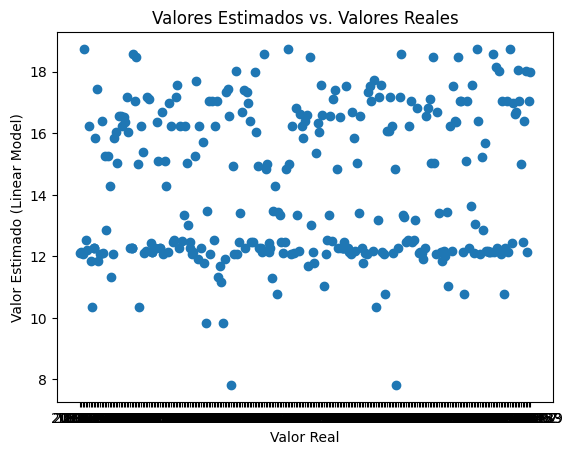

In [26]:
# Hacer una gráfica de dispersión entre los valores estimados y los valores reales de prueba
plt.scatter(y_test, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado (Linear Model)')
plt.title('Valores Estimados vs. Valores Reales')
plt.show()

In [25]:
# Imprimir los valores reales junto con sus valores predichos
print("Valor Real\tValor Predicho (Lineal)")
for real, pred in zip(y_test, y_pred):
    print(f"{real}\t\t{pred}")

Valor Real	Valor Predicho (Lineal)
7.087		12.122637381064436
9.47		12.12498986644377
6.86		12.06350070206301
20.81793		18.742063374064315
22.02703		12.532708512006508
5.065		12.191591614565624
18.91566		16.237045127343947
19.76048		11.862949387481763
13.51192		10.342476604144053
8.16		12.261298405139371
16.31807		15.835062684003617
19.73139		17.45402046450272
19.66365		11.862949387481763
7.154		12.06350070206301
17.91986		16.388379221199273
7.443		12.122637381064436
17.79926		15.262128576905582
17.91862		12.840048756405167
16.60997		15.25948465258719
17.11686		14.271746457570316
13.40196		11.339303910043014
8.16		12.261298405139371
6.986		12.06350070206301
16.26196		15.835062684003617
14.68117		16.036436386006585
20.77744		15.029847864867065
16.63772		16.56944154100495
16.2284		16.56944154100495
17.05517		16.23720223393127
18.6951		16.519442895168282
17.68663		16.366842740856725
16.49744		17.193762670744405
14.36691		16.036436386006585
12.18		12.257009867985602
8.17		12.261298405139371

COEFICIENTES E INTERCEPTO

In [15]:
# Obtener los coeficientes y el término de intercepción del modelo
coeficientes = model.coef_
intercepto = model.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [ 0.70704446 -2.64271734]
Intercepto: -186.92337498207115


**MODELO RANDOM FOREST**

In [17]:
# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Obtener el puntaje (score) del modelo Random Forest en los datos de prueba
score_rf = rf_model.score(X_test, y_test)
print("Puntaje del modelo Random Forest (R^2):", score_rf)

Puntaje del modelo Random Forest (R^2): 0.9702501614682408


In [23]:
# Imprimir los valores reales junto con sus valores predichos
print("Valor Real\tValor Predicho (Random Forest)")
for real, pred in zip(y_test, y_pred_rf):
    print(f"{real}\t\t{pred}")

Valor Real	Valor Predicho (Random Forest)
7.087		7.377151002231017
9.47		9.402510962245382
6.86		7.090368864503212
20.81793		20.662513915833333
22.02703		22.633911419047628
5.065		5.043885167457122
18.91566		18.667756265753972
19.76048		19.786959116497112
13.51192		13.537684174761912
8.16		8.149265861519162
16.31807		16.247834695000005
19.73139		19.08682940724165
19.66365		19.786959116497112
7.154		7.090368864503212
17.91986		18.48749854059524
7.443		7.377151002231017
17.79926		17.995200205535024
17.91862		18.003366666201295
16.60997		16.778529579534627
17.11686		17.14604941558386
13.40196		13.254645011774894
8.16		8.149265861519162
6.986		7.090368864503212
16.26196		16.247834695000005
14.68117		14.451102776587309
20.77744		20.57702778789683
16.63772		16.40837098303751
16.2284		16.40837098303751
17.05517		17.517644992500003
18.6951		18.84654802389611
17.68663		17.50723364638888
16.49744		16.736520521746037
14.36691		14.451102776587309
12.18		11.943684416392184
8.17		8.149265861519162
1